In [3]:
!pip install tqdm

# Download Kaggle dataset 

In [ ]:
#!git clone https://github.com/SIH-22-Kyogre/EyeSea_Image-Preprocessing-Algorithms.git


20952.58s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Cloning into 'EyeSea_Image-Preprocessing-Algorithms'...
remote: Enumerating objects: 960, done.
remote: Counting objects: 100% (960/960), done.
remote: Compressing objects: 100% (568/568), done.
remote: Total 960 (delta 535), reused 776 (delta 375), pack-reused 0 (from 0)
Receiving objects: 100% (960/960), 9.51 MiB | 52.37 MiB/s, done.
Resolving deltas: 100% (535/535), done.


In [7]:
import os
import json
import pathlib
import httpx
from tqdm.notebook import tqdm
from threading import Thread
from queue import Queue

In [8]:
train_json = pathlib.Path('train.json')
eval_json = pathlib.Path('eval.json')

In [9]:
with train_json.open() as f:
    train_data = json.load(f)

with eval_json.open() as f:
    eval_data = json.load(f)

In [10]:
from threading import Thread
from queue import Queue


def download_image(url, path):
    while True:
        try:
            r = httpx.get(url)
            break
        except:
            pass

    with open(path, 'wb') as f:
        f.write(r.content)


def download_images(images, path):
    pathlib.Path(path).mkdir(parents=True, exist_ok=True)
    q = Queue()
    for image in images:
        q.put(image)


    def worker():
        while not q.empty():
            image = q.get()
            download_image(image['coco_url'], os.path.join(path, image['file_name']))
            q.task_done()

    for _ in range(32):
        t = Thread(target=worker)
        t.daemon = True
        t.start()
    q.join()

In [11]:
download_images(eval_data['images'], 'images/eval')


# Convert RGBA to RGB

The processing algorithm only works wirh RGB image, so we have to convert RGBA to RGB

In [ ]:
from PIL import Image
import os

def convert_rgba_to_rgb(data_path):
    for root, _, files in os.walk(data_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        if img.mode == 'RGBA':
                            print(f"Converting {file} from RGBA to RGB...")
                            rgb_img = img.convert('RGB')
                            rgb_img.save(file_path)
                except Exception as e:
                    print(f"Error processing {file}: {e}")

convert_rgba_to_rgb('images/eval/')


Converting 32a69452-b1bb-43cd-b079-c3ff7179f712.png from RGBA to RGB...
Converting 5b97dbbc-9db9-40bc-a3ee-3cec0001ced2.png from RGBA to RGB...
Converting d726fe0b-8089-4ca7-ac0c-ebf3cd025969.png from RGBA to RGB...
Converting 1c84e5d7-37f5-4ef9-ab6f-1cf156cb7ba6.png from RGBA to RGB...
Converting ad39a53d-648c-42f3-857a-84ac124bdf5a.png from RGBA to RGB...
Converting fdfeac2c-efa3-46fd-bae8-c7cf6bdece9a.png from RGBA to RGB...
Converting 32fffc3c-e756-4e21-a369-922fce0ead90.png from RGBA to RGB...
Converting 3de4c36c-0d4a-48ee-9bef-cadba51067f0.png from RGBA to RGB...
Converting a1ce1b5e-9b0e-4588-8c34-a45dcec72f56.png from RGBA to RGB...
Converting ce0da8d2-ae06-4e2d-a082-688f2b3ed813.png from RGBA to RGB...
Converting ee591011-9e41-409b-9a4e-4c117d5b3b42.png from RGBA to RGB...
Converting ad8f185d-3f0d-4cbf-8b36-4cdd0085a047.png from RGBA to RGB...
Converting 363aa74e-ac7e-43b8-8e95-a0b93afc154f.png from RGBA to RGB...
Converting 7f3c97c4-42f2-4309-b788-cdba0030fe9a.png from RGBA to

# Install libraries

The requirements available on the github did not work in my computer, so I manually installed the necessary libraries

In [20]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 80.4 MB/s eta 0:00:000m eta 0:00:01


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
!pip install scikit-image

In [ ]:
!pip install matplotlib

In [ ]:
!pip install opencv-python


In [ ]:
!pip install click

In the code below, change --test_size with the number of images that will be processed, otherwise it will only process 890

In [5]:
!python test_multi.py train --test_dataset train --data_path images/train/ --model_load_path checkpoints/model.pth --test_size 5950  

/home/felipe/Documents/projects/ComputerVision/test_multi.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_load_path))
5950it [21:

## Change names
If desired, change the name of the outputs

In [ ]:
import os
from PIL import Image

input_folder = "results/eval/None/"

output_folder = "results/png/eval"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".png_out.jpg"):
        input_path = os.path.join(input_folder, filename)
        
        new_name = filename.replace(".png_out.jpg", ".png")
        
        output_path = os.path.join(output_folder, new_name)
        
        try:
            with Image.open(input_path) as img:
                img.save(output_path, "PNG")
        except Exception as e:
            print(f"Error when processing {filename}: {e}")


Show specific images to compare

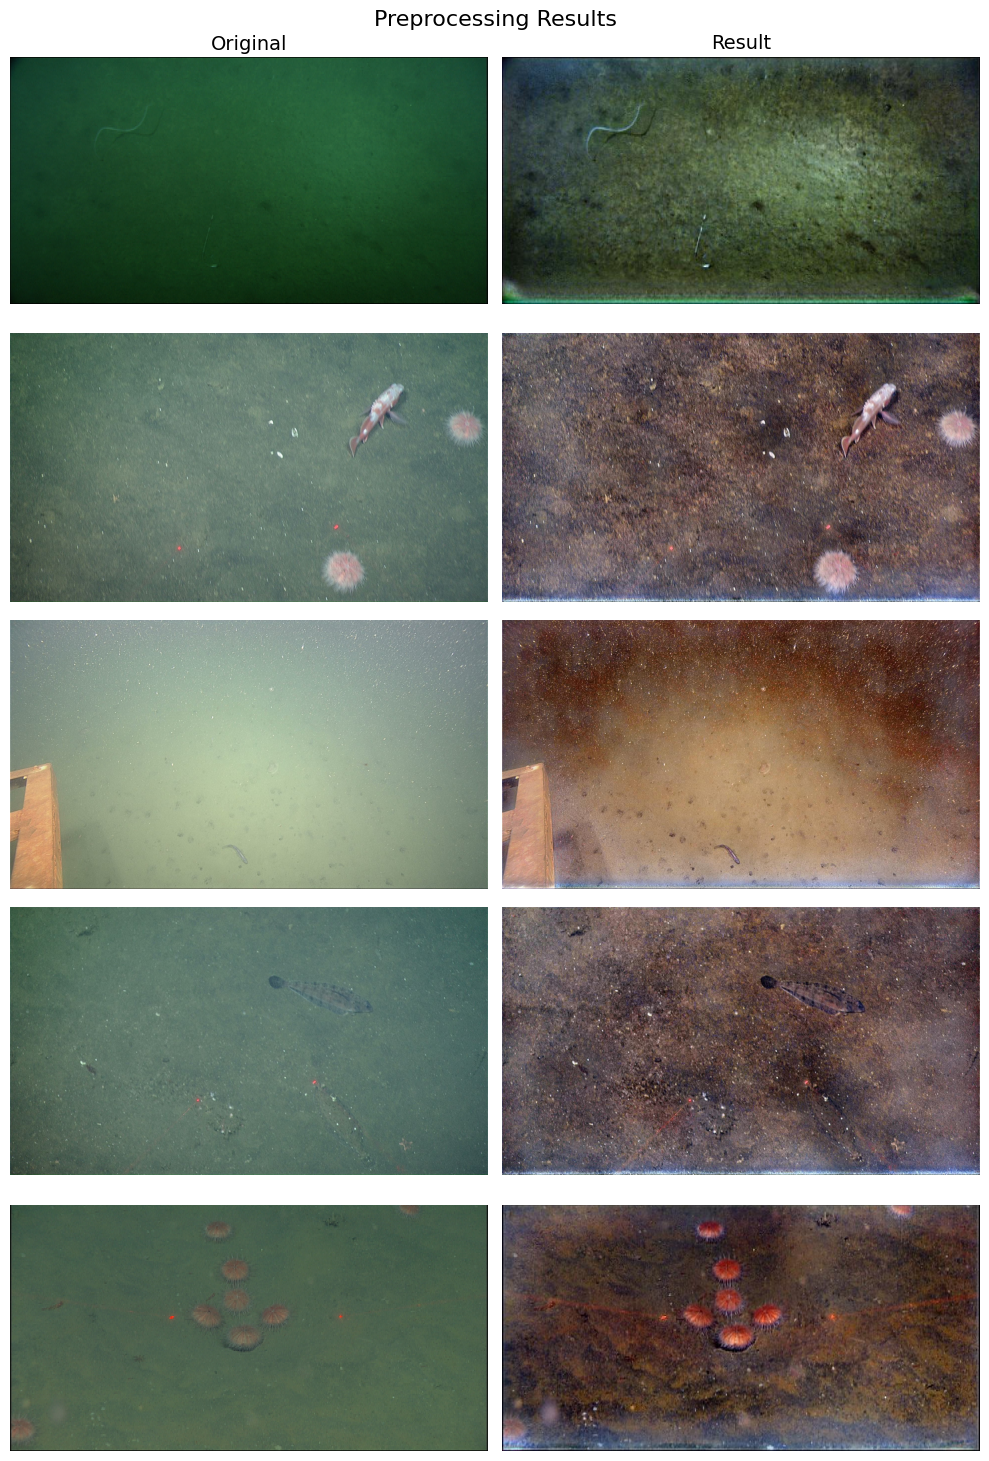

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

original_folder = "images/train"
processed_folder = "results/png/train"

image_files = [
    "0a1cca8f-9e74-488d-a92a-eadd0e9d529a.png",
    "0a1ddbaf-3db9-41ef-84a8-d1bba2c8329d.png",
    "0a4e1af0-c332-4211-bf10-246682ebd32d.png",
    "0a5ee259-d0e6-4885-adf9-7a62a57043fb.png",
    "0a6c68cb-28ef-4126-9615-c3bf76f7a44b.png"
]

original_images = [Image.open(os.path.join(original_folder, img)) for img in image_files]
processed_images = [Image.open(os.path.join(processed_folder, img)) for img in image_files]

fig, axes = plt.subplots(len(image_files), 2, figsize=(10, 3 * len(image_files)))

axes[0, 0].set_title("Original", fontsize=14)
axes[0, 1].set_title("Result", fontsize=14)

for i, (orig_img, proc_img) in enumerate(zip(original_images, processed_images)):
    axes[i, 0].imshow(orig_img)
    axes[i, 0].axis("off")
    
    axes[i, 1].imshow(proc_img)
    axes[i, 1].axis("off")

fig.suptitle("Preprocessing Results", fontsize=16)

plt.tight_layout()  # Reservar espaço para o título
plt.show()
